# **Proyecto TikTok**
**Curso 6 - Los entresijos del aprendizaje automático**

Recuerda que eres un profesional de datos en TikTok. Tu supervisor ha quedado impresionado con el trabajo que has realizado y te ha pedido que construyas un modelo de aprendizaje automático que pueda utilizarse para determinar si un vídeo contiene una reclamación o si ofrece una opinión. Con un modelo de predicción exitoso, TikTok puede reducir la acumulación de informes de usuarios y priorizarlos de manera más eficiente.

Se ha estructurado y preparado un cuaderno para ayudarte en este proyecto. Un cuaderno fue estructurado y preparado para ayudarte en este proyecto. Por favor, complete las siguientes preguntas.

# **Proyecto fin de curso 6: Clasificación de vídeos mediante aprendizaje automático**

En esta actividad, practicará el uso de técnicas de aprendizaje automático para predecir una variable de resultado binaria.
<br/>

**El objetivo** de este modelo es aumentar el tiempo de respuesta y la eficiencia del sistema automatizando las etapas iniciales del proceso de reclamaciones.

**El objetivo** de este modelo es predecir si un vídeo de TikTok presenta una **"reclamación"** o presenta una **"opinión".**
<br/>

*Esta actividad consta de tres partes:*

**Parte 1:** Consideraciones éticas
* Considera las implicaciones éticas de la solicitud

* ¿Debería ajustarse el objetivo del modelo?

**Parte 2:** Ingeniería de características

* Realizar la selección, extracción y transformación de características para preparar los datos para el modelado.

**Parte 3:** Modelización

* Construir los modelos, evaluarlos y asesorar sobre los próximos pasos

Siga las instrucciones y responda a las preguntas siguientes para completar la actividad. A continuación, elaborará un Resumen Ejecutivo utilizando las preguntas que figuran en el Documento de Estrategia PACE.

Asegúrese de completar esta actividad antes de continuar. El siguiente punto del curso le proporcionará un ejemplo completado para que lo compare con su propio trabajo.



# **Clasificar vídeos mediante aprendizaje automático**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


A lo largo de estos cuadernos de proyecto, verás referencias al marco de resolución de problemas PACE. Los siguientes componentes del cuaderno están etiquetados con la etapa PACE correspondiente: Planificar, Analizar, Construir y Ejecutar.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Considere las preguntas de su Documento de Estrategia PACE para reflexionar sobre la etapa del Plan.

En esta etapa, considere las siguientes preguntas:


1.   **¿Qué se le pide que haga? Qué métrica debo utilizar para evaluar el éxito de mi objetivo empresarial/organizativo?**.

2.   **¿Cuáles son las implicaciones éticas del modelo? ¿Cuáles son las consecuencias de que su modelo cometa errores?**
  * ¿Cuál es el efecto probable del modelo cuando predice un falso negativo (es decir, cuando el modelo dice que un vídeo no contiene una afirmación y en realidad sí la contiene)?

  * ¿Cuál es el efecto probable del modelo cuando predice un falso positivo (es decir, cuando el modelo dice que un vídeo contiene una afirmación y en realidad no la contiene)?

3.   **¿Cómo procedería?**


**1. ¿Qué se le pide que haga?**

**Necesidad del negocio y objetivo del modelo**

Los usuarios de TikTok pueden denunciar los vídeos que consideren que infringen las condiciones de servicio de la plataforma. Como hay millones de vídeos de TikTok creados y vistos cada día, esto significa que se denuncian muchos vídeos&mdash; demasiados para ser revisados individualmente por un moderador humano.

Los análisis indican que cuando los autores infringen las condiciones del servicio, es mucho más probable que presenten una afirmación que una opinión. Por eso es útil poder determinar qué vídeos son afirmaciones y qué vídeos son opiniones.

TikTok quiere construir un modelo de aprendizaje automático para ayudar a identificar afirmaciones y opiniones. Los vídeos etiquetados como opiniones tendrán menos probabilidades de ser revisados por un moderador humano. Los vídeos etiquetados como afirmaciones se clasificarán mediante un proceso posterior para determinar si se les debe dar prioridad en la revisión. Por ejemplo, tal vez los vídeos clasificados como reclamaciones se clasificarían en función del número de veces que han sido denunciados, y el x% superior sería revisado por un humano cada día.

Un modelo de aprendizaje automático sería de gran ayuda para presentar a los moderadores humanos los vídeos con más probabilidades de infringir las condiciones de servicio de TikTok.

**Diseño del modelo y variable objetivo**

El diccionario de datos muestra que existe una columna denominada `claim_status`. Se trata de un valor binario que indica si un vídeo es una reclamación o una opinión. Esta será la variable objetivo. En otras palabras, para cada vídeo, el modelo debe predecir si se trata de una afirmación o de una opinión.

Se trata de una tarea de clasificación porque el modelo predice una clase binaria.

**Seleccione una métrica de evaluación**

Para determinar qué métrica de evaluación puede ser la mejor, considere cómo puede equivocarse el modelo. Hay dos posibilidades de predicciones erróneas:

  - **Falsos positivos:** Cuando el modelo predice que un vídeo es una afirmación cuando en realidad es una opinión.
  - **Falsos negativos:** Cuando el modelo predice que un vídeo es una opinión cuando en realidad es una afirmación.



**2. ¿Cuáles son las implicaciones éticas de construir el modelo?**
En el escenario dado, es mejor que el modelo prediga falsos positivos cuando comete un error, y peor que prediga falsos negativos. Es muy importante identificar los vídeos que incumplen las condiciones del servicio, aunque eso signifique que algunos vídeos de opinión se clasifiquen erróneamente como afirmaciones. El peor caso para una opinión mal clasificada como afirmación es que el vídeo pase a revisión humana. El peor caso para una afirmación mal clasificada como opinión es que el vídeo no sea revisado _y_ viole las condiciones del servicio. Un vídeo que infrinja las condiciones del servicio se considerará publicado por un autor "prohibido", como se indica en el diccionario de datos.

Dado que es más importante minimizar los falsos negativos, la métrica de evaluación del modelo será **recuperación**.


**3. ¿Cómo procedería?

**Flujo de trabajo de modelización y proceso de selección de modelos.

El trabajo previo con estos datos ha revelado que hay ~20.000 vídeos en la muestra. Esto es suficiente para llevar a cabo un riguroso flujo de trabajo de validación de modelos, dividido en los siguientes pasos:

1.  Dividir los datos en conjuntos de entrenamiento/validación/prueba (60/20/20)
2.  Ajustar los modelos y los hiperparámetros en el conjunto de entrenamiento.
3.  Realizar la selección final del modelo en el conjunto de validación
4. Evaluar el rendimiento del modelo campeón en el conjunto de pruebas.

### **Tarea 1. Importación y carga de datos**

Comienza importando los paquetes necesarios para construir modelos de aprendizaje automático que permitan alcanzar el objetivo de este proyecto.

In [1]:
# Importar paquetes para manipulación de datos
import pandas as pd
import numpy as np

# Importar paquetes para visualización de datos
import matplotlib.pyplot as plt 
import seaborn as sns

# Importar paquetes para preprocesamiento de datos
from sklearn.feature_extraction.text import CountVectorizer

# Paquetes de importación para modelado de datos
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance


Ahora cargue los datos del archivo csv proporcionado en un marco de datos.

**Nota:** Como se muestra en esta celda, el conjunto de datos se ha cargado automáticamente. No es necesario descargar el archivo .csv ni proporcionar más código para acceder al conjunto de datos y continuar con este laboratorio. Por favor, continúe con esta actividad completando las siguientes instrucciones.

In [2]:
# Cargar el conjunto de datos en el marco de datos
data = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Considere las preguntas de su Documento de Estrategia PACE para reflexionar sobre la etapa Analizar.

### **Tarea 2: Examinar datos, información resumida y estadísticas descriptivas**

Inspeccione las cinco primeras filas del marco de datos.

In [3]:
# Mostrar las primeras filas
data.head()


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Obtenga el número de filas y columnas del conjunto de datos.

In [4]:
# Obtener el número de filas y columnas
data.shape


(19382, 12)

Obtenga los tipos de datos de las columnas.

In [5]:
# Obtenga los tipos de datos de las columnas.
data.dtypes


#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Obtenga información básica sobre el conjunto de datos.

In [6]:
# Obtenga información básica 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generar estadísticas descriptivas básicas sobre el conjunto de datos.

In [7]:
# Generar estadísticas descriptivas básicas sobre el conjunto de datos.
data.describe()


,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Busque y maneje los valores faltantes.

In [8]:
# Comprobar valores faltantes
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [9]:
# Eliminar filas con valores faltantes
data=data.dropna(axis=0)

In [10]:
# Mostrar las primeras filas después de tratar los valores perdidos
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Compruebe y gestione los duplicados.

In [11]:
# Comprobar si hay duplicados
data.duplicated().sum()

0

No hay observaciones duplicadas en los datos.

Compruebe y trate los valores atípicos.

Los modelos basados en árboles son resistentes a los valores atípicos, por lo que no es necesario imputar o descartar ningún valor en función de su posición en la distribución.

Comprobar el equilibrio de la clase.

In [12]:
# normalize=True= resultados deben ser normalizados, expresados como proporciones en lugar de recuentos absolutos. 
data["claim_status"].value_counts(normalize=True)


claim_status
claim      0.503458
opinion    0.496542
Name: proportion, dtype: float64

Aproximadamente el 50,3% del conjunto de datos representa reclamaciones y el 49,7% opiniones, por lo que la variable de resultado está equilibrada.

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**
Considere las preguntas de su Documento de Estrategia PACE para reflexionar sobre la fase de Construcción.

### **Tarea 3: Ingeniería de funciones**

Extraiga la longitud de cada `video_transcription_text` y añádala como columna al marco de datos, para poder utilizarla como característica potencial en el modelo.

In [13]:
# Extrae la longitud de cada `video_transcription_text` y añádela como columna al dataframe
data['longitud_texto'] = data['video_transcription_text'].str.len() # saber la longuitud del texto
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,longitud_texto
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


Calcule la longitud_texto media de las afirmaciones y opiniones.

In [14]:
# Calcule la longitud_texto media de las afirmaciones y opiniones.
data[['claim_status', 'longitud_texto']].groupby('claim_status').mean()

,longitud_texto
claim_status,
claim,95.376978
opinion,82.722562


Visualice la distribución de `longitud_texto` para alegaciones y opiniones.

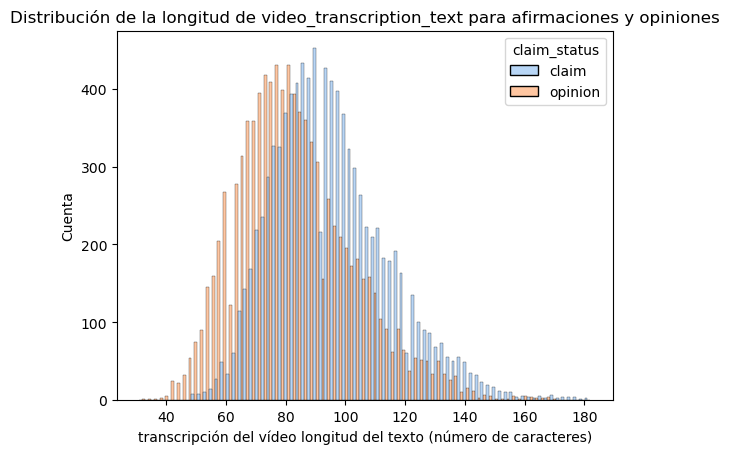

In [15]:
# Visualiza la distribución de `longitud_texto` para reclamaciones y opiniones
# Crear dos histogramas en un gráfico
sns.histplot(data=data, stat="count", multiple="dodge", x="longitud_texto",
             kde=False, palette="pastel", hue="claim_status",
             element="bars", legend=True)
plt.xlabel("transcripción del vídeo longitud del texto (número de caracteres)")
plt.ylabel("Cuenta")
plt.title("Distribución de la longitud de video_transcription_text para afirmaciones y opiniones")
plt.show()

**Selección y transformación de características**

Codificar variables objetivo y catgóricas.

In [16]:
# Crea una copia de los datos X
X=data.copy()

# Elimina las columnas innecesarias
X = X.drop(['#', 'video_id'], axis=1)

# Codificar variable de destino
X['claim_status'] = X['claim_status'].replace({'opinion': 0, 'claim': 1})

#Codificar los valores categóricos restantes
X = pd.get_dummies(X,
                   columns=['verified_status', 'author_ban_status'],
                   drop_first=True)
X.head()

,claim_status,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,longitud_texto,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,1,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,1,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,1,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,1,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,1,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


### **Tarea 4: Dividir los datos**

Asignar variable objetivo.
En este caso, la variable de destino es `claim_status`.
* 0 representa una opinión
* 1 representa una reclamación

In [17]:
#Aislar variable objetivo
y=X["claim_status"]


Aísla las características.

In [18]:
# Aislar las características
X=X.drop(["claim_status"],axis=1)
# Mostrar las primeras filas del marco de datos de características
X.head()

,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,longitud_texto,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


#### **Tarea 5: Crear conjuntos de entrenamiento/validación/prueba**

Dividir los datos en conjuntos de entrenamiento y de prueba, 80/20.

In [19]:
# Divide los datos en conjuntos de entrenamiento y de prueba.
X_tr, X_test, y_tr, y_test=train_test_split(X,y, test_size=0.2, random_state=0)

Divida el conjunto de entrenamiento en conjuntos de entrenamiento y validación, 75/25, para obtener una proporción final de 60/20/20 para los conjuntos de entrenamiento/validación/prueba.

In [20]:
# Divide los datos de entrenamiento en conjuntos de entrenamiento y validación.
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state=0)

Confirme que las dimensiones de los conjuntos de entrenamiento, validación y prueba están alineadas.

In [21]:
# Obtener la forma de cada conjunto de entrenamiento, validación y prueba.
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape


((11450, 11), (3817, 11), (3817, 11), (11450,), (3817,), (3817,))

- El número de características (`11`) coincide con los conjuntos de entrenamiento y prueba.
- El número de filas coincide entre las características y la variable de resultado para el entrenamiento (`11.450`) y los datos de validación y prueba (`3.817`).

### **CONTENIDO BONO - Tokenizar columna de texto**

**NOTA:** No se espera que hagas esto ni que lo sepas, pero puede que te resulte útil y/o interesante entender algunas ideas básicas sobre el procesamiento del lenguaje natural (PLN), debido a la naturaleza de los datos proporcionados en este proyecto TikTok.

La característica `video_transcription_text` está basada en texto. No es una variable categórica, ya que no tiene un número fijo de valores posibles. Una forma de extraer características numéricas de ella es a través de un algoritmo de bolsa de palabras como [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html).

funciona dividiendo el texto en n-gramas, que son grupos de n palabras consecutivas. Por ejemplo, "diez centavos por una taza de café" (frase A) dividida en 2-gramas daría como resultado seis combinaciones de dos palabras:


`a dime` | `dime for` |`for a`| `a cup` | `cup of` | `of coffee` |

A continuación, el texto de la siguiente muestra se analizaría en 2gramas. Así, "pedir una taza para un niño" (frase B) daría como resultado:

`ask for` |`for a`| `a cup` | `cup for` | `for a` | `a child` |
Este proceso se repetiría para cada observación del conjunto de datos, y cada n-grama se trataría como una característica distinta. A continuación, se compara el texto de cada observación con el conjunto completo de n-gramas y se cuenta el número de apariciones:

|  | `a dime` |`dime for`  |`for a`| `a cup` | `cup of` | `of coffee` | `ask for` | `cup for` | `a child` |
|--: |:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|phrase A |1|1|1|1|1|1|0|0|0|
|phrase B |0|0|2|1|1|0|1|1|1|
|**TOTAL**|1|1|3|2|2|1|1|1|1|

Esto ocurriría para el texto de cada observación en los datos, y el texto de cada observación se analiza para obtener recuentos de todas las frases de 2 palabras de todo el conjunto de datos para cada observación, creando una gran matriz.

Si el texto se divide en 1-gramas, entonces cada característica en la matriz es una palabra individual.

Una vez creada la matriz de recuento, `CountVectorizer` le permite elegir si desea conservar sólo los n-gramas más frecuentes. Usted especifica cuántos. Los n-gramas seleccionados pueden utilizarse como características en un modelo.

Dividir el texto en n-gramas es un ejemplo de tokenización. La tokenización es el proceso de dividir el texto en unidades más pequeñas para extraer el significado de los tokens resultantes.

Este cuaderno divide el texto de la transcripción de cada vídeo en 2 y 3 gramos y, a continuación, toma los 15 tokens más frecuentes de todo el conjunto de datos para utilizarlos como características.

In [24]:
# Configura un objeto `CountVectorizer`, que convierte una colección de texto en una matriz de conteo de tokens.
count_vec = CountVectorizer(ngram_range=(2, 3),
                            max_features=15,
                            stop_words='english')
count_vec

CountVectorizer(max_features=15, ngram_range=(2, 3), stop_words='english')

Ajuste el vectorizador a los datos de entrenamiento (genere los n-gramas) y transfórmelos (cuente las ocurrencias). Ajústalo sólo a los datos de entrenamiento, no a los de validación o prueba.

In [25]:
# Extraer características numéricas de `video_transcription_text` en el conjunto de entrenamiento
count_data = count_vec.fit_transform(X_train['video_transcription_text']).toarray()
count_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [26]:
# Coloca la representación numérica de `video_transcription_text` del conjunto de entrenamiento en un dataframe
count_df = pd.DataFrame(data=count_data, columns=count_vec.get_feature_names_out())

# Display first few rows
count_df.head()

,colleague discovered,colleague learned,colleague read,discovered news,discussion board,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
# Concatenar `X_train` y `count_df` para formar el dataframe final de los datos de entrenamiento (`X_train_final`)
# Nota: Usar `.reset_index(drop=True)` para restablecer el índice en X_train después de eliminar `video_transcription_text`,
# para que los índices se alineen con los de `X_train` y `count_df`.
X_train_final = pd.concat([X_train.drop(columns=['video_transcription_text']).reset_index(drop=True), count_df], axis=1)

# Mostrar las primeras filas
X_train_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,longitud_texto,verified_status_verified,author_ban_status_banned,author_ban_status_under review,...,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,51,2487.0,310.0,20.0,1.0,0.0,134,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1,43,118512.0,3543.0,374.0,70.0,29.0,97,False,True,False,...,0,1,0,0,0,0,0,0,0,0
2,22,105902.0,1885.0,229.0,39.0,9.0,76,False,False,True,...,0,1,0,0,0,0,0,0,0,0
3,17,9245.0,1670.0,440.0,13.0,4.0,58,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,18,3791.0,660.0,63.0,9.0,1.0,57,False,False,False,...,0,0,0,0,0,0,0,0,0,0


Obtener el recuento de n-gramas para los datos de validación. Fíjate en que el vectorizador no se está ajustando a los datos de validación. Sólo los está transformando. En otras palabras, las transcripciones de los vídeos de los datos de validación sólo se comparan con los n-gramas encontrados en los datos de entrenamiento.

In [28]:
# Extraer características numéricas de `video_transcription_text` en el conjunto de pruebas.
validation_count_data = count_vec.transform(X_val['video_transcription_text']).toarray()
validation_count_data

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [29]:
# Coloca la representación numérica de `video_transcription_text` del conjunto de validación en un dataframe
validation_count_df = pd.DataFrame(data=validation_count_data, columns=count_vec.get_feature_names_out())
validation_count_df.head()

,colleague discovered,colleague learned,colleague read,discovered news,discussion board,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [30]:
# Concatenar `X_val` y `validation_count_df` para formar el marco de datos final para los datos de entrenamiento (`X_val_final`)
# Nota: Usar `.reset_index(drop=True)` para restablecer el índice en X_val después de eliminar `video_transcription_text`,
# para que los índices se alineen con los de `validation_count_df`.
X_val_final = pd.concat([X_val.drop(columns=['video_transcription_text']).reset_index(drop=True), validation_count_df], axis=1)

# Display first few rows
X_val_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,longitud_texto,verified_status_verified,author_ban_status_banned,author_ban_status_under review,...,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,11,578891.0,379596.0,14612.0,6591.0,44.0,72,False,False,True,...,0,0,0,0,0,0,0,1,0,0
1,24,6255.0,1709.0,311.0,13.0,1.0,96,False,False,False,...,0,0,0,0,0,0,0,0,0,0
2,35,410356.0,249714.0,26235.0,2060.0,1252.0,88,False,False,False,...,0,1,0,0,0,0,0,1,0,0
3,58,406911.0,25986.0,1230.0,564.0,248.0,83,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,47,972573.0,138167.0,25320.0,3331.0,968.0,104,False,False,True,...,0,0,0,0,0,0,0,1,0,0


Repita el proceso para obtener los recuentos de n-gramas de los datos de prueba. De nuevo, no reajuste el vectorizador a los datos de prueba. Sólo transfórmelos.

In [31]:
# Extraer características numéricas de `video_transcription_text` en el conjunto de pruebas.
test_count_data = count_vec.transform(X_test['video_transcription_text']).toarray()

# Colocar la representación numérica de `video_transcription_text` del conjunto de pruebas en un dataframe
test_count_df = pd.DataFrame(data=test_count_data, columns=count_vec.get_feature_names_out())

# Concatenar `X_val` y `validation_count_df` para formar el marco de datos final para los datos de entrenamiento (`X_val_final`)
X_test_final = pd.concat([X_test.drop(columns=['video_transcription_text']
                                      ).reset_index(drop=True), test_count_df], axis=1)
X_test_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,longitud_texto,verified_status_verified,author_ban_status_banned,author_ban_status_under review,...,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,54,692084.0,135956.0,16591.0,622.0,312.0,107,False,False,False,...,0,0,0,1,1,0,0,0,0,0
1,37,5164.0,1858.0,36.0,17.0,1.0,69,True,False,True,...,0,0,0,0,0,0,0,0,0,0
2,39,801951.0,344163.0,57608.0,8578.0,2942.0,90,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,44,6429.0,2314.0,847.0,17.0,5.0,76,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,26,555780.0,106863.0,15348.0,252.0,91.0,72,False,False,False,...,0,0,0,0,0,0,0,0,0,0


### **Tarea 6. Construir modelos**


### **Construir un modelo de bosque aleatorio**

Ajuste un modelo de bosque aleatorio al conjunto de entrenamiento. Utiliza la validación cruzada para ajustar los hiperparámetros y selecciona el modelo con mejor rendimiento de recuperación.


In [36]:
# Instanciar el clasificador de bosque aleatorio
rf = RandomForestClassifier(random_state=0)

# Crear un diccionario de hiperparámetros a ajustar
cv_params = {'max_depth': [5, 7, None],
             'max_features': [0.3, 0.6],
            #  'max_features': 'auto'
             'max_samples': [0.7],
             'min_samples_leaf': [1,2],
             'min_samples_split': [2,3],
             'n_estimators': [75,100,200],
             }

# Definir un diccionario de métricas de puntuación para capturar
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instanciar el objeto GridSearchCV
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='recall')

In [37]:
%%time
rf_cv.fit(X_train_final, y_train)

CPU times: user 5min 35s, sys: 561 ms, total: 5min 36s
Wall time: 5min 36s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, None], 'max_features': [0.3, 0.6],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [75, 100, 200]},
             refit='recall', scoring={'accuracy', 'f1', 'precision', 'recall'})

In [38]:
# Examinar la mejor puntuación de recuerdo
rf_cv.best_score_

0.9948228253467271

In [39]:
# Examinar los mejores parámetros
rf_cv.best_params_

{'max_depth': None,
 'max_features': 0.6,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

**Pregunta:** ¿Cuál es el rendimiento de su modelo? Considere la puntuación media de recall y precisión.


Este modelo funciona excepcionalmente bien, con una puntuación media de 0,995 en los cinco pliegues de validación cruzada. Tras comprobar la puntuación de precisión para asegurarnos de que el modelo no clasifica todas las muestras como reclamaciones, queda claro que este modelo realiza clasificaciones casi perfectas.

### **Construir un modelo XGBoost**

In [40]:
# Instanciar el clasificador XGBoost
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# Crear un diccionario de hiperparámetros a ajustar
cv_params = {'max_depth': [4,8,12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300, 500]
             }
# Definir un diccionario de métricas de puntuación para capturar
scoring = {'accuracy', 'precision', 'recall', 'f1'}
# Instanciar el objeto GridSearchCV
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='recall')

In [41]:
%%time
xgb_cv.fit(X_train_final, y_train)

CPU times: user 9min 52s, sys: 2.1 s, total: 9min 54s
Wall time: 5min 4s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [4, 8, 12],
                         'min_child_weight': [3, 5],
                         'n_estimators': [300, 500]},
             refit='recall', scoring={'accuracy', 'f1', 'precision', 'recall'})

In [42]:
xgb_cv.best_score_

0.9906808769992594

In [43]:
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 5,
 'n_estimators': 300}

**Pregunta:** ¿Cuál es el rendimiento de su modelo? Considere la puntuación de recuerdo y la puntuación de precisión.

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**
Considere las preguntas de su Documento de Estrategia PACE para reflexionar sobre la etapa Ejecutar.

### **Tarea 7. Evaluar el modelo**

Evaluar los modelos en función de los criterios de validación.

#### **Bosque aleatorio**

In [44]:
# Utilizar el modelo de bosque aleatorio "mejor estimador" para obtener predicciones sobre el conjunto de validación.
y_pred = rf_cv.best_estimator_.predict(X_val_final)

Mostrar las predicciones en el conjunto de pruebas codificado.

In [45]:
# Mostrar las predicciones sobre el conjunto de pruebas codificado
y_pred

array([1, 0, 1, ..., 1, 1, 1])

Muestra las etiquetas verdaderas del conjunto de pruebas.

In [46]:
# Mostrar las etiquetas verdaderas del conjunto de pruebas
y_val

5846     1
12058    0
2975     1
8432     1
6863     1
        ..
6036     1
6544     1
2781     1
6426     1
4450     1
Name: claim_status, Length: 3817, dtype: int64

Crear una matriz de confusión para visualizar los resultados del modelo de clasificación.

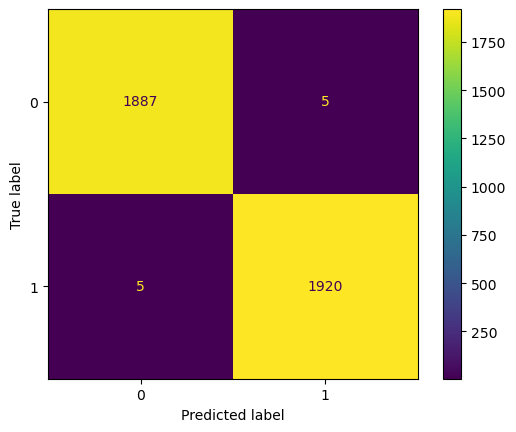

In [47]:
# Crear una matriz de confusión para visualizar los resultados del modelo de clasificación

# Calcular los valores de la matriz de confusión
log_cm = confusion_matrix(y_val, y_pred)

# Crear la visualización de la matriz de confusión
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)



# Trazar matriz de confusión
log_disp.plot()

# Visualizar gráfico
plt.show()


El cuadrante superior izquierdo muestra el número de verdaderos negativos: el número de opiniones que el modelo clasificó correctamente como tales.

El cuadrante superior derecho muestra el número de falsos positivos: el número de opiniones que el modelo clasificó erróneamente como reclamaciones.

El cuadrante inferior izquierdo muestra el número de falsos negativos: el número de reclamaciones que el modelo clasificó erróneamente como opiniones.

El cuadrante inferior derecho muestra el número de verdaderos positivos: el número de afirmaciones que el modelo clasificó correctamente como tales.

Un modelo perfecto arrojaría todos los verdaderos negativos y verdaderos positivos, y ningún falso negativo o falso positivo.

Como muestra la matriz de confusión anterior, este modelo no produce ningún falso negativo.

Cree un informe de clasificación que incluya las métricas de precisión, recuperación, puntuación f1 y exactitud para evaluar el rendimiento del modelo.

In [49]:
# Crear un informe de clasificación
# Crear informe de clasificación para modelo de bosque aleatorio
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       1.00      1.00      1.00      1892
       claim       1.00      1.00      1.00      1925

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



**Pregunta:** ¿Qué indica su informe de clasificación? ¿Qué indica la matriz de confusión?


El informe de clasificación anterior muestra que las puntuaciones del modelo de bosque aleatorio fueron casi perfectas. La matriz de confusión indica que se produjeron 10 errores de clasificación: cinco falsos positivos y cinco falsos negativos.

#### **XGBoost**

Ahora, evalúe el modelo XGBoost en el conjunto de validación.

In [50]:
#Evaluar el modelo XGBoost
y_pred = xgb_cv.best_estimator_.predict(X_val_final)

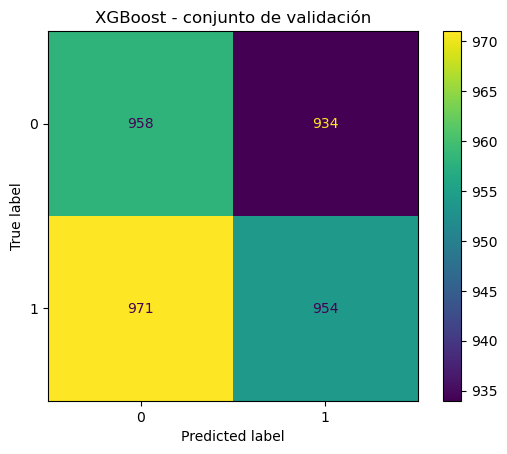

In [58]:
# Calcular los valores de la matriz de confusión
log_cm = confusion_matrix(y_val, y_pred)

# Crear la visualización de la matriz de confusión
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Trazar matriz de confusión
log_disp.plot()

# Mostrar gráfico
plt.title('XGBoost - conjunto de validación');
plt.show()


In [52]:
# Crear un informe de clasificación
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      0.99      1892
       claim       1.00      0.99      0.99      1925

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817



**Pregunta:** Describa los resultados de su modelo XGBoost. Cómo se compara su modelo XGBoost con su modelo de bosque aleatorio?

Los resultados del modelo XGBoost también fueron casi perfectos. Sin embargo, sus errores tendían a ser falsos negativos. Identificar las reclamaciones era la prioridad, por lo que es importante que el modelo sea bueno capturando todos los vídeos de reclamaciones reales. El modelo de bosque aleatorio tiene una mejor puntuación de recuperación, por lo que es el modelo campeón.

### **Usa el modelo campeón para predecir en datos de prueba**

Ambas arquitecturas de modelo, random forest y XGBoost, dieron como resultado modelos casi perfectos. Sin embargo, en este caso el bosque aleatorio funcionó un poco mejor, por lo que es el modelo campeón.

Ahora, utiliza el modelo campeón para predecir los datos de prueba.

In [53]:
# Usar el modelo campeón para predecir en los datos de prueba
y_pred = rf_cv.best_estimator_.predict(X_test_final)

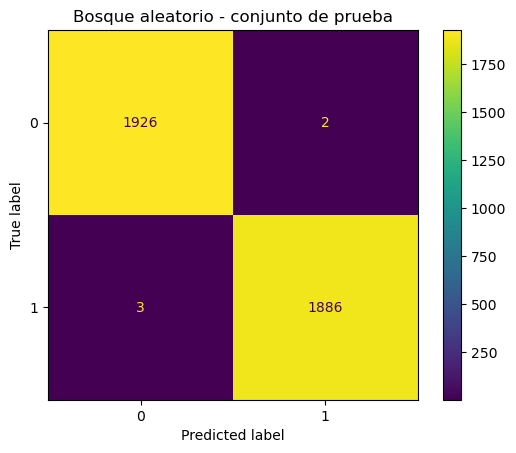

In [61]:
# Calcular los valores de la matriz de confusión
log_cm = confusion_matrix(y_test, y_pred)

# Crear la visualización de la matriz de confusión
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Trazar matriz de confusión
log_disp.plot()

# Mostrar gráfico
plt.title('Bosque aleatorio - conjunto de prueba');
plt.show()


#### **Importancias del modelo campeón**


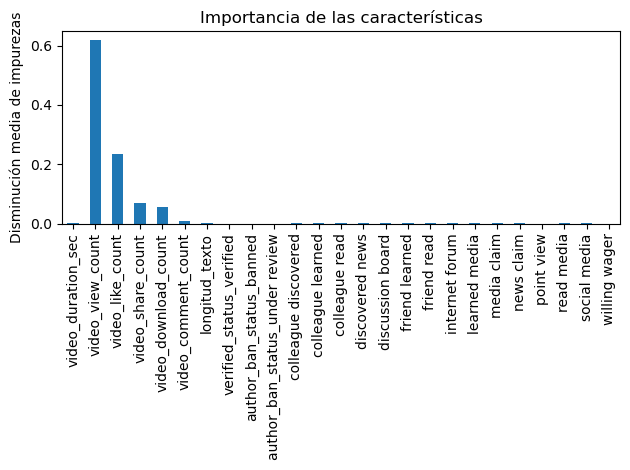

In [62]:
importances = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test_final.columns)

fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title('Importancia de las características')
ax.set_ylabel('Disminución media de impurezas')
fig.tight_layout()

**Pregunta:** Describa sus características más predictivas. ¿Le sorprendieron sus resultados?

Todas las características más predictivas estaban relacionadas con los niveles de compromiso generados por el vídeo. Esto no es inesperado, ya que los análisis de AED anteriores apuntaban a esta conclusión.

### **Tarea 8. Conclusión**

En este paso, utilice los resultados de los modelos anteriores para formular una conclusión. Considere las siguientes preguntas:

1. **¿Recomendarías utilizar este modelo? ¿Por qué sí o por qué no?**.

2. **¿Qué hacía tu modelo? ¿Puede explicar cómo hacía predicciones?**

3. **¿Hay nuevas características que pueda diseñar para mejorar el rendimiento del modelo?**

4. **¿Qué características le gustaría tener para mejorar el rendimiento de su modelo?**

Recuerde que, a veces, sus datos simplemente no pueden predecir el objetivo elegido. Esto es habitual. El aprendizaje automático es una herramienta potente, pero no mágica. Si sus datos no contienen una señal predictiva, ni siquiera el algoritmo más complejo podrá ofrecer predicciones coherentes y precisas. No tenga miedo de sacar esta conclusión.


1. *¿Recomendarías usar este modelo? ¿Por qué o por qué no?*
Sí, se puede recomendar este modelo porque funcionó bien tanto en los datos de validación como en los de prueba. Además, tanto la precisión como las puntuaciones F<sub>1</sub> fueron consistentemente altas. El modelo clasificó con gran éxito afirmaciones y opiniones.
</br>
2. *¿Qué estaba haciendo tu modelo? ¿Puedes explicar cómo hacía las predicciones?*
Todas las características más predictivas del modelo estaban relacionadas con los niveles de participación del usuario asociados con cada video. Clasificaba los videos según la cantidad de vistas, me gusta, compartidos y descargas que recibían.
</br>
3. *¿Hay nuevas características que puedas diseñar que puedan mejorar el rendimiento del modelo?*
Debido a que el modelo actualmente funciona casi a la perfección, no es necesario diseñar ninguna característica nueva.
</br>
4. *¿Qué características le gustaría tener que probablemente mejorarían el rendimiento de su modelo?*
La versión actual del modelo no necesita ninguna característica nueva. Sin embargo, sería útil saber la cantidad de veces que se denunció el video. También sería útil tener el número total de informes de usuarios para todos los vídeos publicados por cada autor.


**Felicitaciones!** Has completado este laboratorio. Sin embargo, es posible que no notes una marca de verificación verde junto a este elemento en la plataforma de Coursera. Por favor, continúa tu progreso independientemente de la marca de verificación. Simplemente haga clic en el icono "guardar" en la parte superior de este cuaderno para asegurarse de que su trabajo ha sido registrado.